In [21]:
import logging
import argparse
import pathlib
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt




In [5]:
data_directory = ["./out"]
dfs = []

for directory in data_directory:
    
    directory = pathlib.Path(directory)
    assert directory.is_dir(), f"{directory} does not exist"
    for file in directory.glob("*.txt"):
        df = pd.read_csv(file, sep = "\t").assign(parameters = lambda df_: [str(file.stem).replace("_timings", "")] * df_.shape[0])
        dfs.append(df)
        
df = pd.concat(dfs, axis = "rows")
        
        
     



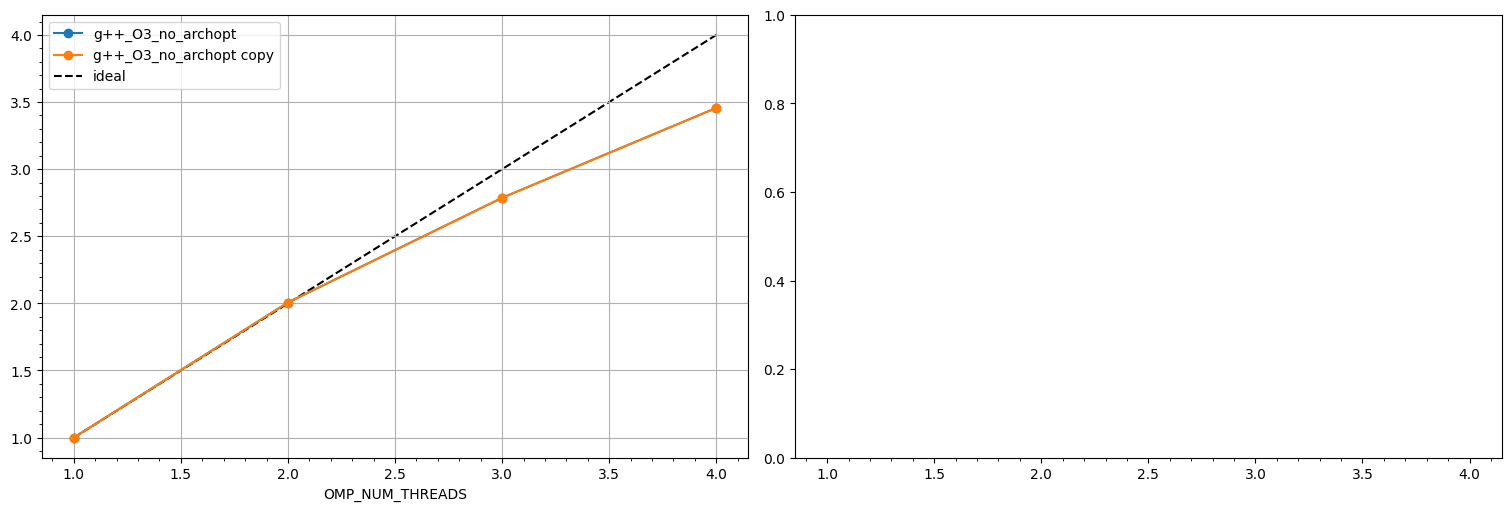

In [46]:
piv_table = df.pivot_table(index = "OMP_NUM_THREADS", values = "FIT_TIME", columns = ["parameters"], aggfunc="mean")
piv_table = piv_table.div(piv_table.iloc[0], axis = "columns").pow(-1)
y_values = np.arange(1, piv_table.index[-1] + 1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, layout="constrained", figsize=(15, 5))
ax1.minorticks_on()
piv_table.plot(kind = "line", marker = "o", ax = ax1, grid = True)
ax1.plot(y_values, y_values, color='black', linestyle='--', label='ideal', zorder=1)
ax1.legend()

In [28]:
y_values = np.arange(1, piv_table.index[-1] + 1, 1)

In [40]:
piv_table_2 = df.pivot_table(index = "OMP_NUM_THREADS", values = ["FIT_TIME", ], columns = ["parameters"], aggfunc="mean")

parameters,g++_O3_no_archopt,g++_O3_no_archopt copy
OMP_NUM_THREADS,,
1,1.000000,1.000000
2,2.006416,2.006416
3,2.786440,2.786440
4,3.456120,3.456120


In [42]:
df_iterations = df.assign(iterations_second = lambda df_: df_["NUM_ITERATIONS"] / (df_["FIT_TIME"] / 1000))

In [43]:
df_iterations

,OMP_NUM_THREADS,FIT_TIME,NUM_ITERATIONS,parameters,iterations_second
0,1,13172.20,57,g++_O3_no_archopt copy,4.327295
1,1,13343.60,57,g++_O3_no_archopt copy,4.271711
2,1,13332.70,57,g++_O3_no_archopt copy,4.275203
3,1,13370.70,57,g++_O3_no_archopt copy,4.263053
4,1,13117.30,57,g++_O3_no_archopt copy,4.345406
...,...,...,...,...,...
75,4,3960.10,57,g++_O3_no_archopt,14.393576
76,4,3814.04,57,g++_O3_no_archopt,14.944783
77,4,3804.07,57,g++_O3_no_archopt,14.983951
78,4,3857.44,57,g++_O3_no_archopt,14.776639


52